In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('car_data.csv')

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
df.drop(columns='Car_Name',inplace=True)

In [8]:
current_year=2023

In [9]:
df['Year']=current_year-df['Year']


In [10]:
df=pd.get_dummies(df,drop_first=True)

In [11]:
x_col=df.columns

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,0,1,0,1
1,10,4.75,9.54,43000,0,1,0,0,1
2,6,7.25,9.85,6900,0,0,1,0,1
3,12,2.85,4.15,5200,0,0,1,0,1
4,9,4.60,6.87,42450,0,1,0,0,1


In [13]:
X=df.drop(columns='Selling_Price')
y=df['Selling_Price']
X_col=X.columns

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale=StandardScaler()

In [16]:
X=scale.fit_transform(X)

In [17]:
X=pd.DataFrame(X,columns=X_col)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
X_train.shape

(210, 8)

In [21]:
y_train.shape

(210,)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
Lr=LinearRegression()

In [24]:
Lr.fit(X_train,y_train)

LinearRegression()

In [25]:
Y_pred=Lr.predict(X_test)

In [26]:
Lr.coef_

array([-1.14449208,  3.70298541, -0.22696222, -0.20883338,  1.12588116,
        0.31465322, -0.53832951, -0.44774511])

In [27]:
pd.DataFrame(Lr.coef_,index=X_test.columns,columns=['Coefficient'])

,Coefficient
Year,-1.144492
Present_Price,3.702985
Kms_Driven,-0.226962
Owner,-0.208833
Fuel_Type_Diesel,1.125881
Fuel_Type_Petrol,0.314653
Seller_Type_Individual,-0.538330
Transmission_Manual,-0.447745


In [28]:
Lr.intercept_

4.708293306501394

In [29]:
from sklearn import metrics

In [30]:
metrics.mean_squared_error(y_test,Y_pred)

1.6702095947569655

In [31]:
metrics.r2_score(y_test,Y_pred)

0.9081383338136442

<Axes: xlabel='Selling_Price'>

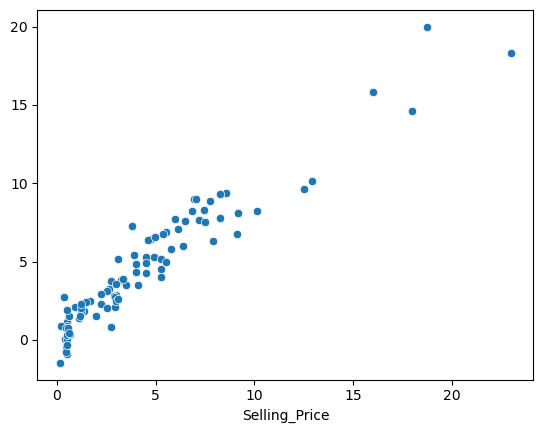

In [32]:
sns.scatterplot(x=y_test,y=Y_pred)

In [33]:
len(y_test)

91

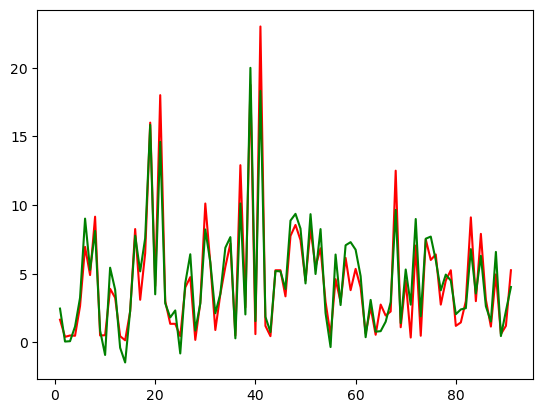

In [34]:
n=[i for i in range(1,92)]
plt.plot(n,y_test,color='red')
plt.plot(n,Y_pred,color='green')